### ML - Ankara, Turkey Chapter - Predicting Student Success Using Machine Learning
### Project Overview
> In this project, the Omdena Ankara, Turkey Chapter team will be utilizes data analysis and machine learning > > methods to enhance student success in the education system and promote data-driven education policies. The > findings obtained will be utilized by education administrators, teachers, and policymakers to identify more effective strategies for enhancing students’ academic achievements.

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [2]:
train_data_path = "../Data/train-student-mat.csv"
test_data_path = "../Data/test-student-mat.csv"

In [3]:
# Read the train dataset into a dataframe
train_data = pd.read_csv(train_data_path)

In [4]:
# View the first 5 records 
train_data.head()

,Unnamed: 0,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Final_Score
0,1,1,GP,F,17,U,GT3,T,1,1,...,3,3,1,1,3,4,5,5,6,5.4
1,2,2,GP,F,15,U,LE3,T,1,1,...,3,2,2,3,3,10,7,8,10,8.5
2,4,4,GP,F,16,U,GT3,T,3,3,...,3,2,1,2,5,4,6,10,10,8.8
3,6,6,GP,M,16,U,LE3,T,2,2,...,4,4,1,1,3,0,12,12,11,11.6
4,8,8,GP,M,15,U,LE3,A,3,2,...,2,2,1,1,1,0,16,18,19,17.8


In [5]:
# Read the test dataset into a dataframe
test_data = pd.read_csv(test_data_path)

In [6]:
# View the first 5 records
test_data.head()

,Unnamed: 0,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Final_Score
0,78,78,GP,M,17,U,GT3,T,2,1,...,5,1,1,1,3,2,8,8,10,8.8
1,371,371,MS,M,18,R,LE3,T,1,2,...,3,3,2,3,3,3,14,12,12,12.6
2,248,248,GP,M,18,R,LE3,T,3,3,...,3,3,1,3,5,8,3,5,5,4.4
3,55,55,GP,F,16,U,GT3,A,2,1,...,3,4,1,1,2,8,8,9,10,9.1
4,390,390,MS,M,20,U,LE3,A,2,2,...,5,4,4,5,4,11,9,9,9,9.0


In [7]:
# Check out the variables data type and also take a closer look at the data info.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   277 non-null    int64  
 1   id           277 non-null    int64  
 2   school       277 non-null    object 
 3   sex          277 non-null    object 
 4   age          277 non-null    int64  
 5   address      277 non-null    object 
 6   famsize      277 non-null    object 
 7   Pstatus      277 non-null    object 
 8   Medu         277 non-null    int64  
 9   Fedu         277 non-null    int64  
 10  Mjob         277 non-null    object 
 11  Fjob         277 non-null    object 
 12  reason       277 non-null    object 
 13  guardian     277 non-null    object 
 14  traveltime   277 non-null    int64  
 15  studytime    277 non-null    int64  
 16  failures     277 non-null    int64  
 17  schoolsup    277 non-null    object 
 18  famsup       277 non-null    object 
 19  paid    

In [8]:
# Check available columns
for i, v in enumerate(train_data):
    print(i, v)

0 Unnamed: 0
1 id
2 school
3 sex
4 age
5 address
6 famsize
7 Pstatus
8 Medu
9 Fedu
10 Mjob
11 Fjob
12 reason
13 guardian
14 traveltime
15 studytime
16 failures
17 schoolsup
18 famsup
19 paid
20 activities
21 nursery
22 higher
23 internet
24 romantic
25 famrel
26 freetime
27 goout
28 Dalc
29 Walc
30 health
31 absences
32 G1
33 G2
34 G3
35 Final_Score


In [9]:
# Drop columns that are not needed in both datasets
train_data.drop(['G1','G2','G3','Unnamed: 0', 'id' ], axis=1, inplace=True)
test_data.drop(['G1','G2','G3','Unnamed: 0', 'id' ], axis=1, inplace=True)

In [10]:
# Cleaning column names
train_data = train_data.rename(columns=lambda x: x.strip())
test_data = test_data.rename(columns=lambda x: x.strip())

In [11]:
# Convert column names to lowercase
train_data.columns = train_data.columns.str.lower()
test_data.columns = test_data.columns.str.lower()

In [12]:
# Import needed libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [13]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                       'nursery', 'higher', 'internet', 'romantic']

for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

In [14]:
# Prepare features and target
X_train = train_data.drop(columns=['final_score'])
y_train = train_data['final_score']

X_test = test_data.drop(columns=['final_score'])
y_test = test_data['final_score']

### Random Forest Regression

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Regressor with tuned hyperparameters
random_forest_model = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, random_state=42)

# Train the model on the scaled training data
random_forest_model.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
random_forest_predictions = random_forest_model.predict(X_test_scaled)

In [16]:
# Evaluate the model
mae_random_forest = mean_absolute_error(y_test, random_forest_predictions)
rmse_random_forest = mean_squared_error(y_test, random_forest_predictions, squared=False)
r2_random_forest = r2_score(y_test, random_forest_predictions)

# Print metrics for Random Forest Regressor
print("Random Forest Regressor - Mean Absolute Error:", mae_random_forest)
print("Random Forest Regressor - Root Mean Squared Error:", rmse_random_forest)

Random Forest Regressor - Mean Absolute Error: 2.7276402013440695
Random Forest Regressor - Root Mean Squared Error: 3.6415808124769358


### Feature Importances

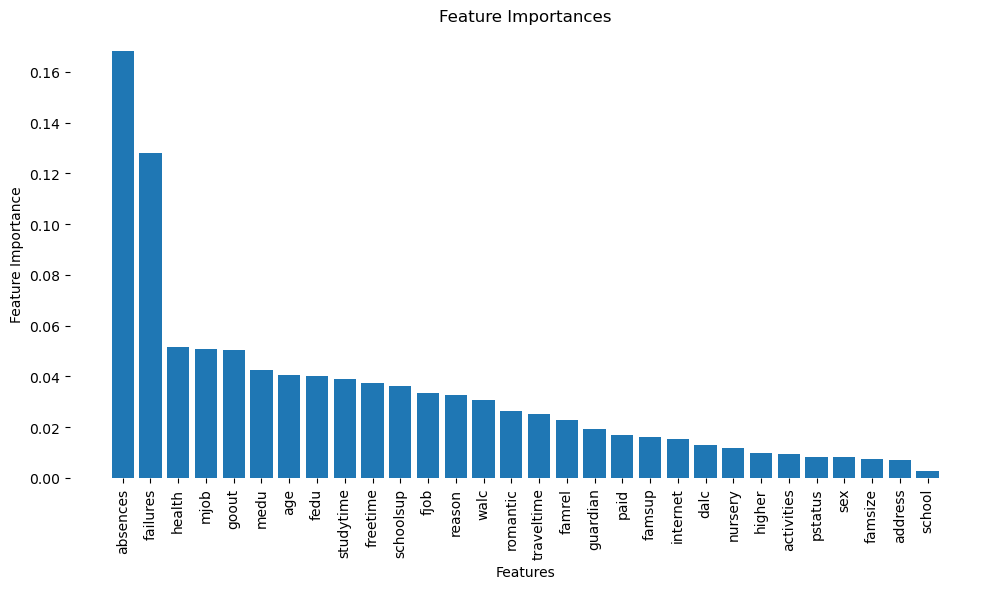

In [17]:
# Get feature importances
feature_importances = random_forest_model.feature_importances_
feature_names = X_train.columns

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()